In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1

In [2]:
def jacobiMat(A, b, x0, s):
    n = np.shape(A)[0]

    x = np.copy(x0)
    M = np.diag(np.diag(A))
    N = A - M

    error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
    k = 0
    while k in range(s) and error>10**(-8):
        x = -(np.linalg.inv(M) @ N) @ x + np.linalg.inv(M) @ b
        error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
        #print(x)
        k += 1
    return(x, k)

Ejercicio 2

In [3]:
A = np.array([[4,2,1],[1,4,1],[2,1,5]])
b = np.array([9,5,0])
x0 = np.array([1,1,1])

In [4]:
jacobiMat(A,b,x0,50)

(array([ 2.00000001,  1.        , -0.99999999]), 36)

Ejercicio 3

In [5]:
#Version 1 (anda bien pero los graficos quedan un poco raros)

def metodoSOR(A, b, x0, w, s,):
    n = np.shape(A)[0]

    x = np.copy(x0)
    M = np.diag(np.diag(A)) + w * np.tril(A,-1) #np.tril() Devuelve la triangular inferior
    N = A*w- M

    error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
    k = 0

    while k in range(s) and (error>10**(-8)):
        x = (-np.linalg.inv(M) @ N) @ x + np.linalg.inv(M) @ (w*b) 
        error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
        #print(x)
        k += 1
    return(x, k)

#Version 2 (Falta modificarla, en las otras funciones me tira error)
"""
def metodoSOR(A, b, x0, w, s,):
    n = np.shape(A)[0]

    x = np.copy(x0)
    
    U = np.triu(A,1)
    D = np.diag(A)
    L = np.tril(A,-1)
    Minv = np.linalg.inv(D + w * L ) #np.tril() Devuelve la triangular inferior
    error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
    k = 0

    while k in range(s) and (error>10**(-8)):
        x = Minv @ (w*b-(w*U+(w-1)*D)@x)#x + np.linalg.inv(M) @ (w*b) 
        error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
        #print(x)
        k += 1
    return(x, k)
"""

'\ndef metodoSOR(A, b, x0, w, s,):\n    n = np.shape(A)[0]\n\n    x = np.copy(x0)\n    \n    U = np.triu(A,1)\n    D = np.diag(A)\n    L = np.tril(A,-1)\n    Minv = np.linalg.inv(D + w * L ) #np.tril() Devuelve la triangular inferior\n    error = np.linalg.norm(A@x-b)/np.linalg.norm(b)\n    k = 0\n\n    while k in range(s) and (error>10**(-8)):\n        x = Minv @ (w*b-(w*U+(w-1)*D)@x)#x + np.linalg.inv(M) @ (w*b) \n        error = np.linalg.norm(A@x-b)/np.linalg.norm(b)\n        #print(x)\n        k += 1\n    return(x, k)\n'

Ejercicio 4

In [6]:
metodoSOR(A,b,x0,1,50)

(array([ 1.99999998,  1.        , -0.99999999]), 13)

In [7]:
metodoSOR(A,b,x0,1.5,50)

(array([ 1.99999998,  0.99999999, -1.        ]), 43)

In [8]:
metodoSOR(A,b,x0,2.5,50)

(array([-2.01349162e+11,  1.21088400e+11,  2.93734627e+11]), 50)

Ejercicio 5

In [9]:
x0 = np.random.rand(5) # reales aleatorios entre 0 y 1. No es todo R5
b = np.random.rand(5) # reales aleatorios entre 0 y 1. No es todo R5
A = np.random.rand(5,5)
for i in range(4):
  A[i][i]=4

In [10]:
jacobiMat(A, b, x0, 100) # Probar esto varias veces que a veces no converge en 100 pasos

(array([-3.89187390e+14, -3.51258835e+14, -3.03799899e+14, -2.39793692e+14,
        -2.08712155e+15]), 100)

Ejercicio 6

In [11]:
ws = np.linspace(0,2,1001)
pasos = np.zeros(len(ws))

In [12]:
for i in range(len(ws)):
  pasos[i] = metodoSOR(A,b,x0,ws[i],100)[1]

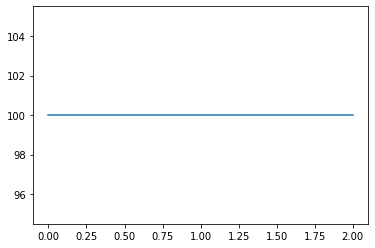

In [13]:
plt.plot(ws,pasos)
plt.show()

Ejercicio 7

In [14]:
def radioEspectralSOR(A,w):
  D = np.diag(np.diag(A))
  L = np.tril(A,-1) #Devuelve la triangular inferior
  U = np.triu(A,1) #Devuelve la triangular superior
  M = np.linalg.inv(D+w*L)@(-(w*U+(w-1)*D))
  return max(abs(np.linalg.eigvals(M)))

Ejercicio 8

In [15]:
radios = np.zeros(len(ws))

In [16]:
for i in range(len(ws)):
  radios[i] = radioEspectralSOR(A,ws[i])

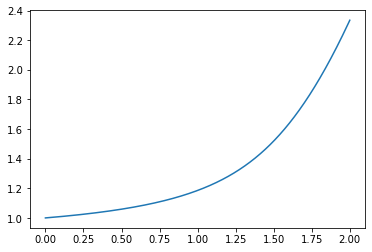

In [17]:
plt.plot(ws,radios)
plt.show()

Ejercicio 9

In [18]:
determinantes = np.zeros(len(ws))

In [19]:
for i in range(len(ws)):
  determinantes[i] = (1-ws[i])**len(A) # Formula vista en clase para el determinante de la matriz de iteracion (Ni idea, me la pasó manu)

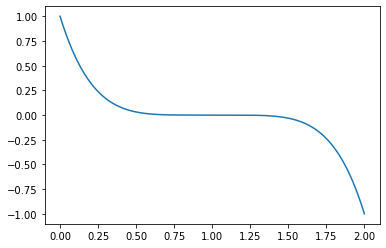

In [20]:
plt.plot(ws,determinantes)
plt.show()